# <font color='red'>ExtraaLearn Project</font>
**Marks: 60/60 - graded by MIT Professional Education Program (Applied Data Science Program)**
</body>

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## <font color='blue'>Importing necessary libraries and data</font>

In [ ]:
# Ignore all type of warnings from Python (e.g., depreciation)
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Library to create a test dataset
from sklearn.model_selection import train_test_split

# Models to use
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score,precision_score, accuracy_score
from sklearn import metrics

# For tuning the model
from sklearn.model_selection import GridSearchCV

## <font color='blue'>Data Overview</font>

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the directory to current path
import os
path = '/content/drive/MyDrive/Colab Notebooks/MIT Applied Data Science/Projects/Elective/'
os.chdir(path)
current_working_directory = os.getcwd()
current_working_directory

'/content/drive/MyDrive/Colab Notebooks/MIT Applied Data Science/Projects/Elective'

In [ ]:
leads = pd.read_csv('ExtraaLearn.csv')

In [ ]:
# Copying data to another variable to avoid any changes to original data
data = leads.copy()

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**
*   The dataset has 4612 entries and 15 columns
*   There are no null values in each field of this dataset
*   we have a mix of object fields - `ID`, `current_occupation`,`profile_completed`, `last_activity`, `print_media_type1`, `print_media_type2`,`digital_media`, `educational_channels`, `referral`. The rest are numerical variables - `website_visits`, `time_spent_on_website`, `page_views_per_visit`
* `age` is an integer which means values provided are formatted correctly (no float wrongly added)
* `ID` is an identifier of the lead.
* `Status` is a binary and our dependent variable. 1 indicates a lead that ended up becoming a paid customer, 0 indicates a lead that churned.



In [ ]:
# Let's check unicity of the identifier:
data.ID.nunique()

4612

**Observations:**
* `ID`has only unique values. It won't add any value to our analysis. We can drop this column

In [ ]:
data = data.drop(['ID'], axis=1)

## <font color='blue'>Exploratory Data Analysis (EDA)</font>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Summary Statistics for numerical columns

In [ ]:
# Converting the time spent on the website from seconds to minutes
data['time_spent_on_website'] = data['time_spent_on_website']/60

In [ ]:
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.000000,51.000000,57.000000,63.000000
website_visits,4612.0,3.566782,2.829134,0.0,2.000000,3.000000,5.000000,30.000000
time_spent_on_website,4612.0,12.066855,12.397145,0.0,2.479167,6.266667,22.279167,42.283333
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.077750,2.792000,3.756250,18.434000
status,4612.0,0.298569,0.457680,0.0,0.000000,0.000000,1.000000,1.000000


**Observations:**
* The average age of our leads is more than 46, which tells us that our population tends to be composed of more professionals than students which age tends to be younger. The minimum age is 18, so our solution is intended for college students and older. The maximum age is 63, the solution doesn't seem to target retired people, which is inline with the `current_population` flags == no `retired` flag.
* Pursuing on the `age` variable, 75% of our leads are older than 36, which definitely tilts the balance towards more experienced users that are working professionals, or unemployed that are looking to do a career shift. 25% and more of our leads are aged 57 and more, so we do have an appeal for our learning solution from very experienced professionals. We may keep this in mind in the next steps.
* The majority of our leads, i.e. 75%, visited our website 5 times or less, with an average between 3 and 4 times. The max of 30 times seems high compared to the mean value and the 75% percentile, it could be an outlier.
* the `page_views_per_visit` average is a bit more than 3 which is close to the average of 3.5 website visits across all leads. It means that leads in average come to the website an check in average between 1 and 2 pages by visit. Nothing unusual here, this could be a landing page explaining the educational content.
* The average time spent on the website is 12 minutes, which means our leads spend short times on our website in average. The 25% percentile is at 2.5 minutes spent on the website, and 75% percentile at 22 minutes.
* we observe that `website_visits`, `time_spent_on_website`	and `page_views_per_visit` have a minimum of 0. We will further investigate this information in this section to understand what are the use cases behind it.
* Our `status` binary variable mean is at 0.3 meaning we have more leads that will eventually churn than payees. There's more insightful representation of the dependent variable that we can do. Let's do this next.

In [ ]:
# Checking distribution of our target variable status
data['status'].value_counts(normalize=True)

0    0.701431
1    0.298569
Name: status, dtype: float64

**Observations:**
* a little more than 70% of our lead population will be churning.
* Even though this could be worse, this is already an unbalanced dataset. We'll have to account for this in our ML model.

In [ ]:
# Checking consistency of numerical variables website_visits, time_spent_on_website and page_views_per_visit
mask1 = (data.website_visits == 0) & ((data.time_spent_on_website != 0) | (data.page_views_per_visit !=0))
mask2 = (data.time_spent_on_website == 0) & ((data.website_visits != 0) | (data.page_views_per_visit !=0))
mask3 = (data.page_views_per_visit == 0) & ((data.time_spent_on_website != 0) | (data.website_visits !=0))
pd.concat([data[mask1], data[mask2], data[mask3]])

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
2116,57,Professional,Mobile App,Medium,7,1.333333,0.0,Phone Activity,No,No,No,Yes,No,0
2156,51,Unemployed,Website,Medium,3,0.016667,0.0,Email Activity,No,No,No,No,No,0
2632,59,Professional,Website,Medium,3,0.016667,0.0,Email Activity,No,No,No,No,No,0
3115,60,Unemployed,Website,Medium,9,3.833333,0.0,Email Activity,No,No,No,No,No,0
3454,57,Professional,Website,Medium,7,30.033333,0.0,Email Activity,No,No,No,Yes,No,1
4203,34,Unemployed,Mobile App,Medium,1,0.016667,0.0,Email Activity,No,No,No,No,No,0
4204,30,Professional,Mobile App,Medium,4,33.183333,0.0,Email Activity,Yes,No,No,No,No,0


**Observations:**
* The 7 data points above are odd, as we're expecting the page viewed to be at least one if there were website visits and time spent on the website. We assume this is a potential failure from the tagging protocol to capture the data correctly.
* It is possible that the landing page requiring to create an account doesn't count as a page viewed, but as time spent on the website. That would explain it, but for a population of leads, I would expect the percentage of people in that situation to be higher if that was true (only 0.15% of cases here)

In [ ]:
# Investigating situations where the website wasn't visited
mask = (data.website_visits == 0) | (data.time_spent_on_website == 0) | (data.page_views_per_visit == 0)
data[mask]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,56,Professional,Mobile App,Medium,0,0.0,0.0,Phone Activity,No,No,No,No,No,0
37,59,Professional,Website,High,0,0.0,0.0,Email Activity,No,No,No,No,No,1
54,28,Professional,Mobile App,High,0,0.0,0.0,Email Activity,No,No,No,Yes,No,0
94,49,Unemployed,Website,High,0,0.0,0.0,Email Activity,Yes,No,No,No,No,1
127,54,Professional,Mobile App,High,0,0.0,0.0,Phone Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,53,Professional,Mobile App,High,0,0.0,0.0,Email Activity,No,No,No,Yes,No,0
4447,38,Professional,Website,Medium,0,0.0,0.0,Email Activity,No,No,No,No,No,0
4453,56,Professional,Website,High,0,0.0,0.0,Phone Activity,No,No,No,No,No,1
4557,48,Unemployed,Mobile App,Medium,0,0.0,0.0,Email Activity,No,No,No,No,No,0


**Observations:**
* When the website wasn't visited, we can imagine that the leads had information in a different way, on different channels
* Let's confirm this assumption below

In [ ]:
data[mask]['last_activity'].value_counts()

Email Activity    125
Phone Activity     56
Name: last_activity, dtype: int64

we confirm here that our leads had information on the program and their last interaction with ExtraaLearn was through email or phone when the website wasn't visited, which is to be expected.

### Univariate analysis

#### **Checking the distribution and outliers for numerical columns in the data**

age
Skew : -0.72


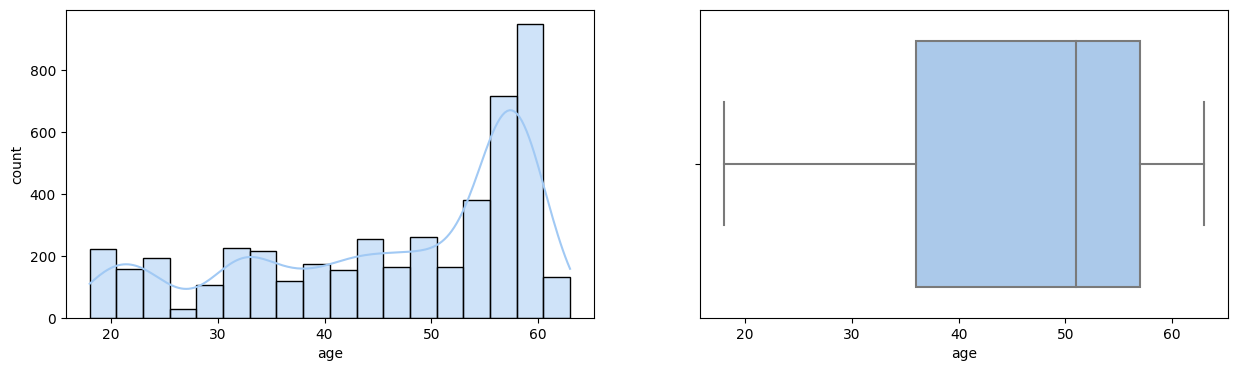

website_visits
Skew : 2.16


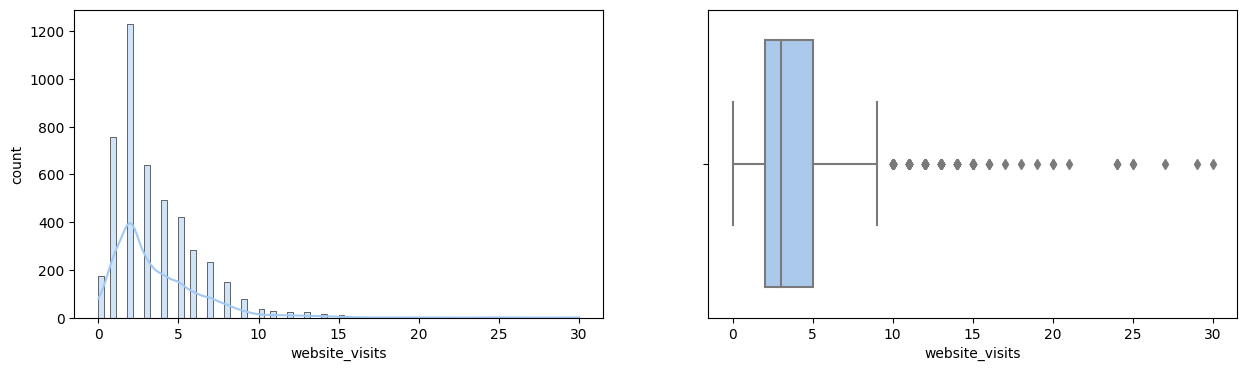

time_spent_on_website
Skew : 0.95


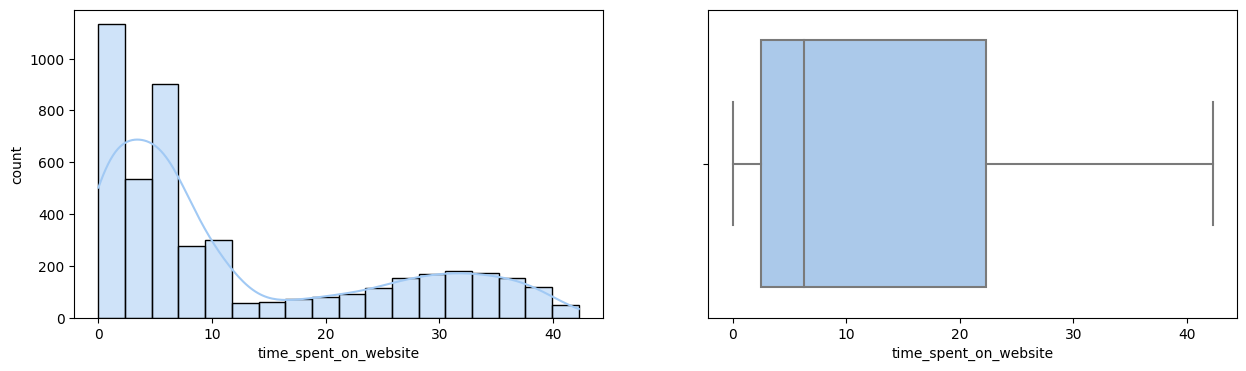

page_views_per_visit
Skew : 1.27


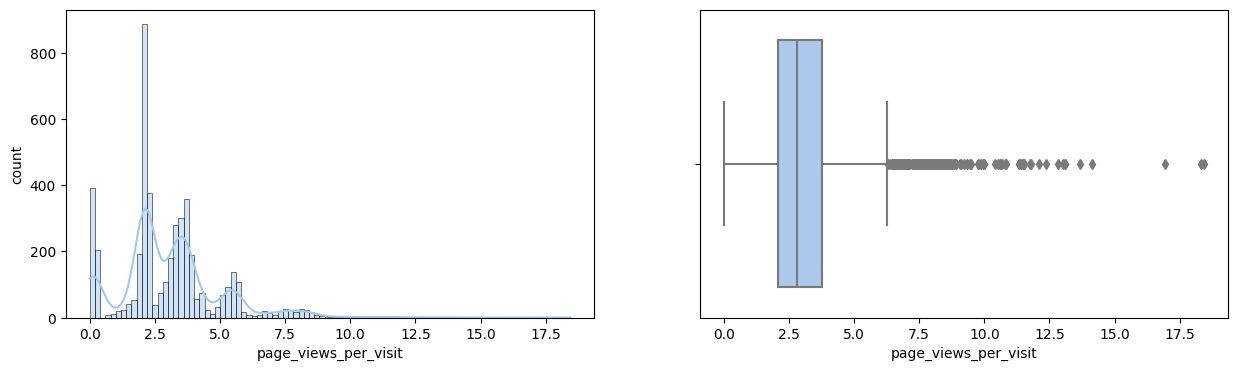

In [ ]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1,2,1)

    sns.histplot(data[col], kde=True)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

**Observations:**
* The distribution of age is left skewed. The majority of our leads are older, the median of our population being above 50. From 18 to 50 yo, our population is leads is fairly uniform overall.
* Website visits are rightly skewed, with 17 outliers ranging above 10 website visits. These outliers don't have values that are outside of normality, the maximum being at around 30 visits.
* `page_views_website` and `time_spent_on_website` are also rightly skewed.
* The time spent on the website tends to be short, with most times being less than 10 minutes. We do see a second peak much lower though around 30 minutes. we might have two type of behaviors from our leads, those coming to have a quick look at the programs offered, maybe prices, and those taking more time to read through the materials exposed on the website.
* the pages viewed per visit is highly concentrated between 0 and 5 pages, the remaining of the values that are above this 6 pages threshold being outliers. 3 outlier points are further away from the rest of the cohort of outliers at around 17.5 pages viewed per visit. We are wondering here if we should be treating these 3 values.

In [ ]:
# Checking consistency of the 3 outliers in our page_views_per_visit that were far from the rest of the outliers:
data[data['page_views_per_visit']>15].loc[:, ['age', 'first_interaction', 'website_visits', 'time_spent_on_website','page_views_per_visit']]

,age,first_interaction,website_visits,time_spent_on_website,page_views_per_visit
4,23,Website,4,10.000000,16.914
32,58,Mobile App,12,19.183333,18.434
268,57,Mobile App,3,16.816667,18.302


**Observations:**

Note: customers are referred in order they are presented: i.e., customer 1 is associated to index 4, and so on

* None of these customers have spent an amount of time that seems to be as high as the number of pages they visited. 10, 16 and 19 minutes is not even at the second smaller peak observed in our distribution of time spent on the website.
* In real life, I would coordinate wiht the data engineering team to see how these values are flagged and better understand the definition.
* Here and also to get the chance to modify outliers which we didn't have in the previous case study, I'll go with the decision of adjusting the value of these outliers to the Upper whisker value (we'll do this in the next section as it's required to modify outliers there)

### **check the percentage of each category for categorical variables.**

In [ ]:
cat_cols = data.columns.drop(num_cols) # extracting categorical variables

for column in cat_cols:
    print(data[column].value_counts(normalize = True))  # The parameter normalize = True gives the percentage of each category
    print('*'*40+'\n') # Separates the next line w/ 40 times * + line break

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************

Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************

High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************

Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************

No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************

No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************

No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************

No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64

**Observations:**
* 56% of our leads are professionals and 31% of them are unemployed. The majority of our leads population are working professionals either employed or unemployed probably looking for a career shift or just upskilling. Students are a minority of our leads.
* The first interaction is well balanced between website 55% and mobile app 44% which is inline with expectations, mobile app becoming more and more a key channel for many businesses.
* Profile completion is overall excellent at almost 100%. The company probably requires it to their leads in their different channels. Once completed we do see that profile completion splits pretty much equally between High completion and Medium completion.
* The last activity with our customer service team happens half of the time by Email, and the remaining part happens pretty much equally between phone and website.
* In terms of media advertisement, we do see that either for newspaper campaigns, magazines or digital media, our leads as a majority (~90% or more) were not captured thanks to these campaigns as they didn't see them at all. Magazine campaigns seem to be performing even more poorly at 5% of captured leads than the other 2 type of media campaigns at around 10%.
* 85% of our leads didn't hear about ExtraaLearn in education channels, so our reputation is still to be built (makes sense for an young growing startup)
* Referrals are extremely low too at 2% of our leads having heard of ExtraaLearn through a reference

In [ ]:
"""
Verifiying if our dataset of leads were able to see more than 1 campaign (that will be further explored later on in the EDA)
To simplify our labels, let's assume that:
- print_media_type1 == news
- print_media_type2 == mag
- digital_media == digi
"""

media = data.loc[:, ['print_media_type1', 'print_media_type2', 'digital_media','status']].copy()

# 3 campaigns at the same time
mask_news_mag_digi = (media['print_media_type1']=='Yes') & (media['print_media_type2']=='Yes') & (media['digital_media']=='Yes')
mask_comb3=mask_news_mag_digi
print('Targeted by 3 campaigns: '+ str(media[mask_comb3].shape[0])+' leads\n')
print('*'*40+'\n') # Separates the next line w/ 40 times * + line break

# 2 campaigns at the same time
mask_mag_digi=(media['print_media_type1']=='No') & (media['print_media_type2']=='Yes') & (media['digital_media']=='Yes')
mask_news_digi=(media['print_media_type1']=='Yes') & (media['print_media_type2']=='No') & (media['digital_media']=='Yes')
mask_news_mag=(media['print_media_type1']=='Yes') & (media['print_media_type2']=='Yes') & (media['digital_media']=='No')
mask_comb2 = (mask_mag_digi) | (mask_news_digi) | (mask_news_mag)
print('Targeted by 2 campaigns: '+ str(media[mask_comb2].shape[0])+' leads\n')
print('*'*40+'\n') # Separates the next line w/ 40 times * + line break

# 1 campaign only
mask_news=(media['print_media_type1']=='Yes') & (media['print_media_type2']=='No') & (media['digital_media']=='No')
mask_mag=(media['print_media_type1']=='No') & (media['print_media_type2']=='Yes') & (media['digital_media']=='No')
mask_digi=(media['print_media_type1']=='No') & (media['print_media_type2']=='No') & (media['digital_media']=='Yes')
mask_comb1 = (mask_news) | (mask_mag) | (mask_digi)
print('Targeted by 1 campaign only: '+ str(media[mask_comb1].shape[0])+' leads\n')
print('*'*40+'\n') # Separates the next line w/ 40 times * + line break

# Not targeted
mask_nomedia = (media['print_media_type1']=='No') & (media['print_media_type2']=='No') & (media['digital_media']=='No')
mask_comb0=mask_nomedia
print('Not targeted: '+ str(media[mask_comb0].shape[0])+' leads\n')

Targeted by 3 campaigns: 4 leads

****************************************

Targeted by 2 campaigns: 107 leads

****************************************

Targeted by 1 campaign only: 1031 leads

****************************************

Not targeted: 3470 leads



**Observations:**
* We notice here that ExtraaLearn has succeeded in targeting 1031 leads who saw one of their 3 media campaigns.
* 107 leads saw exactly two campaigns and only 4 saw all of them.
* This is an important finding, as it's assumed that a combination of media campaigns may increase our conversion rate.

### Bivariate analysis

<Axes: >

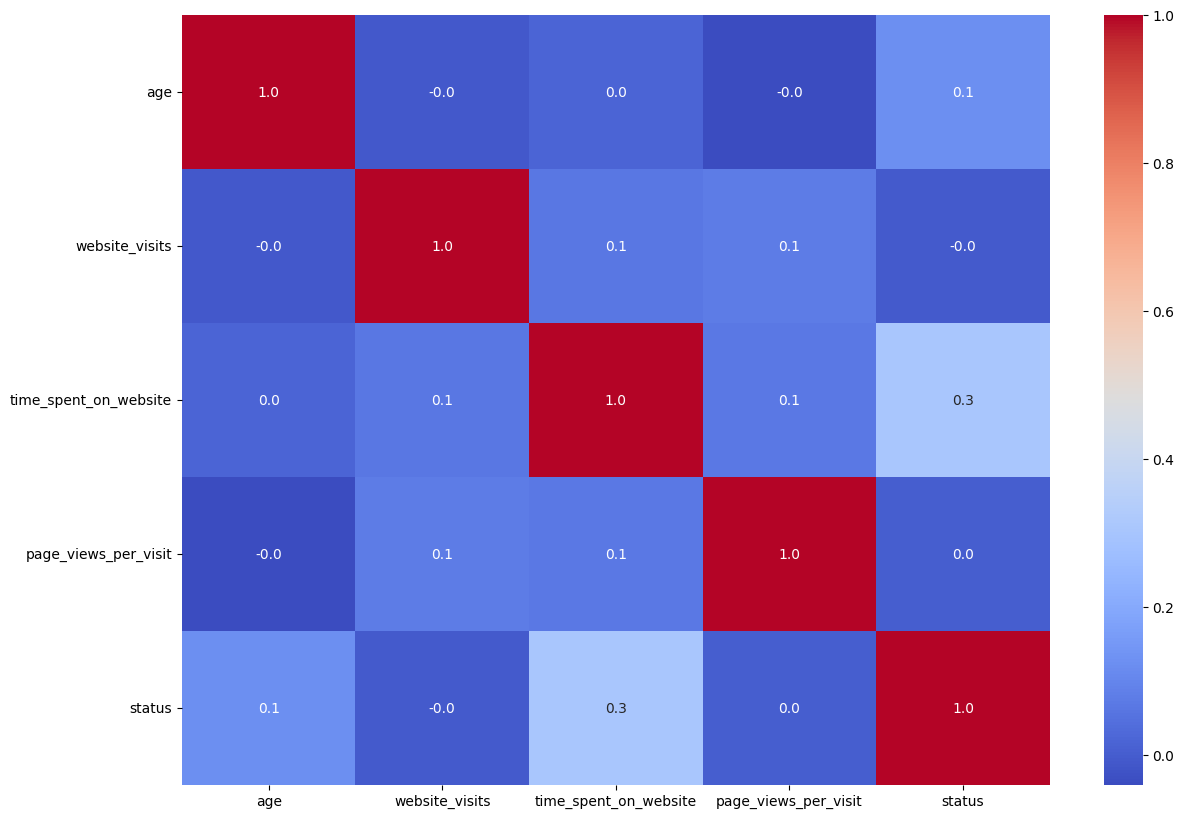

In [ ]:
# Correlation of our numerical variables
corr = data[num_cols].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

**Observations:**
* We didn't necessarily anticipate correlation among our numerical variables overall, and that's what we observe, very little correlation, almost null.
* status seems to be correlated a little bit to the time spent on the website, that's not surprising. We'll keep that in mind moving forward.  
* the time spent on the website could have been correlated with the number of pages viewed per visit, but it's not a necessity. We may have one page with a lot of content and videos, that is our "star" page. So high time spent on the website can mean only 1 page viewed on the website.

In [ ]:
"""
In this case study, we want to display percentages across categories in our countplots.
We define this function now so we can reuse it for the multiple plots that will follow.
We will always use this function to calculate percentages between converted leads and churners.
"""

# Let's create a function that calculates percentages for any categorical variable plotted.
# We'll store converted and churned percentages for each value of our categorical variable

def calculate_converted_percentage(data, variable, variable_val):
    variable_data = data[data[variable] == variable_val]
    total_class = variable_data.shape[0]
    converted = variable_data[variable_data['status'] == 1].shape[0]
    churned = total_class - converted

    converted_percentage = 100 * converted / total_class if total_class > 0 else 0
    churned_percentage = 100 * churned / total_class if total_class > 0 else 0

    return converted_percentage, churned_percentage

In [ ]:
"""
Let's now go into the details of the seaborn plot. The major issue we're facing here is that Seaborn has its own internal order
for patches, and it's not possible to reorder them. We'll account for this with a remapping of our patches from seaborn
to our defined categorical variable orer. We have categorical variables with 2 and 3 values, so  we'll create a mapping for both siutations.

"""

def with_cat_var_percent(ax, data, variable, category_order):
    hue_categories = 2  # Converted and Churned
    bar_order = [0, 3, 1, 4, 2, 5] if len(category_order)==3 else [0, 2, 1, 3] # The identified order of the bars in seaborn for 2 and 3 values in our categorical variable

    for i, variable_val in zip(range(len(category_order)), category_order):
        # Calling our previously defined function to get percentages
        converted_percentage, churned_percentage = calculate_converted_percentage(data, variable, variable_val)

        # This is where we map our patches bars to the right category order, the one we define in the seaborn plot
        converted_bar_idx = bar_order[i * hue_categories]
        churned_bar_idx = bar_order[i * hue_categories + 1]

        # This is where we annotate our calculated percentages from the calculate_converted_percentage() function
        ax.annotate(f'{converted_percentage:.1f}%',
                    (ax.patches[converted_bar_idx].get_x() + ax.patches[converted_bar_idx].get_width() / 2,
                     ax.patches[converted_bar_idx].get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

        ax.annotate(f'{churned_percentage:.1f}%',
                    (ax.patches[churned_bar_idx].get_x() + ax.patches[churned_bar_idx].get_width() / 2,
                     ax.patches[churned_bar_idx].get_height()),
                    ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

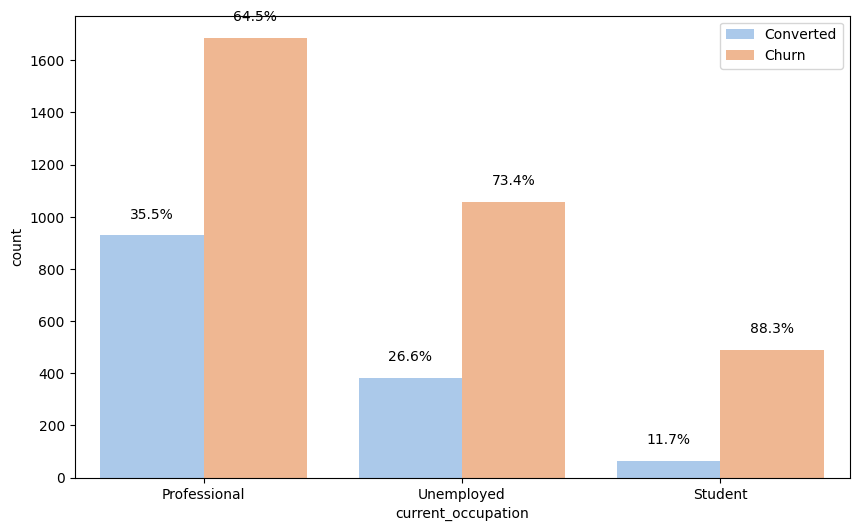

In [ ]:
"""
Plotting current_occupation by status outcome
"""

sns.set_palette("pastel")

# Rearranging status order by most important value which is converted to less important which is churned
status_order = [1,0]

# Rearranging the categorical variable from biggest volumes to lowest volumes
category_order = data['current_occupation'].value_counts().index.tolist()

plt.figure(figsize = (10, 6))

ax = sns.countplot(x = data['current_occupation'], order=category_order, hue=data['status'], hue_order= status_order, palette='pastel')

# Calling our custom made with_cat_var_percent function
with_cat_var_percent(ax, data,'current_occupation', category_order)

# changing 0 label to churn, and 1 to Converted
plt.legend(['Converted', 'Churn'])

plt.show()

In [ ]:
# Verifying that our code with_cat_var_percent works, by comparing to the values below
data[data['current_occupation'] == 'Professional']['status'].value_counts(normalize=True)

0    0.644878
1    0.355122
Name: status, dtype: float64

**Answer to Question 1:** *Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status*.
* Students that are the smallest population in our leads population also end up churning at almost 90%, this category is not our main target population for ExtraaLearn learning products.
* Unemployed leads come as the second biggest population of leads in our dataset, and their conversion rate is at 27% which is close to a third of that population
* Our biggest population of leads are working professionals, and their conversion to paid customers comes at close to 36%. It's our biggest population but also where we are most successful at converting them into paid customers

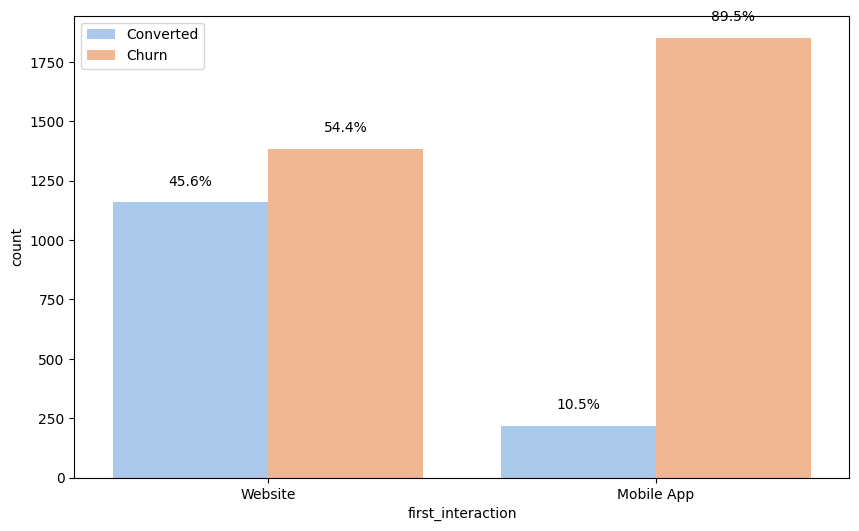

In [ ]:
"""
Plotting first impressions by status outcome
"""

status_order = [1,0]

category_order = data['first_interaction'].value_counts().index.tolist()

plt.figure(figsize = (10, 6))

ax = sns.countplot(x = data['first_interaction'], hue = data['status'], hue_order=status_order, palette='pastel')

with_cat_var_percent(ax, data, 'first_interaction',  category_order)

plt.legend(['Converted', 'Churn'])

plt.show()

**Answer to Question 2:** *The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?*

There's a clear impact here on the channel of first interaction and the outcome of converting our leads:
* Mobile app even though it captures close to 50% of our traffic ends up leading to a conversation rate of only 1 lead over 10. This is very bad and may be due to a poorly optimized website for mobile, a classic flaw in many businesses under-estimating the importance of mobile. It could also just be due to a different experience on the phone and support level provided.
* Website on the other hand, is much more balanced, and leads to 46% conversion which is much better. To summarize, we rely on our website to make revenues.

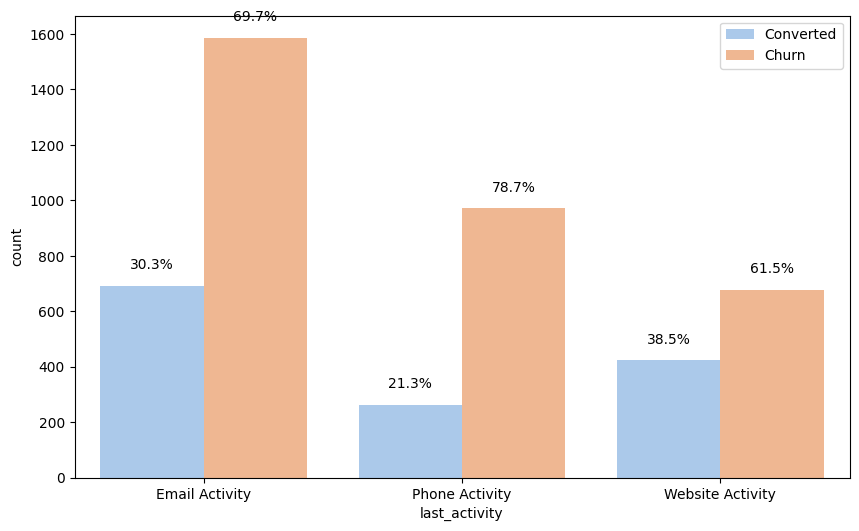

In [ ]:
"""
Plotting last channel of interaction by status outcome
"""

status_order = [1,0]

category_order = data['last_activity'].value_counts().index.tolist()

plt.figure(figsize = (10, 6))

ax = sns.countplot(x = data['last_activity'], hue = data['status'],order = category_order, hue_order=status_order, palette='pastel')

with_cat_var_percent(ax, data,'last_activity', category_order)

plt.legend(['Converted', 'Churn'])

plt.show()

**Answer to Question 3**: *The company uses multiple modes to interact with prospects. Which way of interaction works best?*

Recalling volumes from the univariate analysis, we have phone and website activity representing pretty much 1/4 of our volumes here, the rest being Email.

* Comparing phone and website that have similar volumes of leads, we do have a website channel performing better than phone as 35% of our leads are converted to paid customers when only 24% are on the phone.

* Our Email channel is the biggest in terms of volume, half the dataset of leads goes through this channel. Now the lead conversion rate is still good at 30%. It is interesting that Email is outperforming phone interactions in converting leads, it's usually the opposite as the phone adds a human touch and conversation to the interaction. That would be an interesting thing to investigate with the call center.


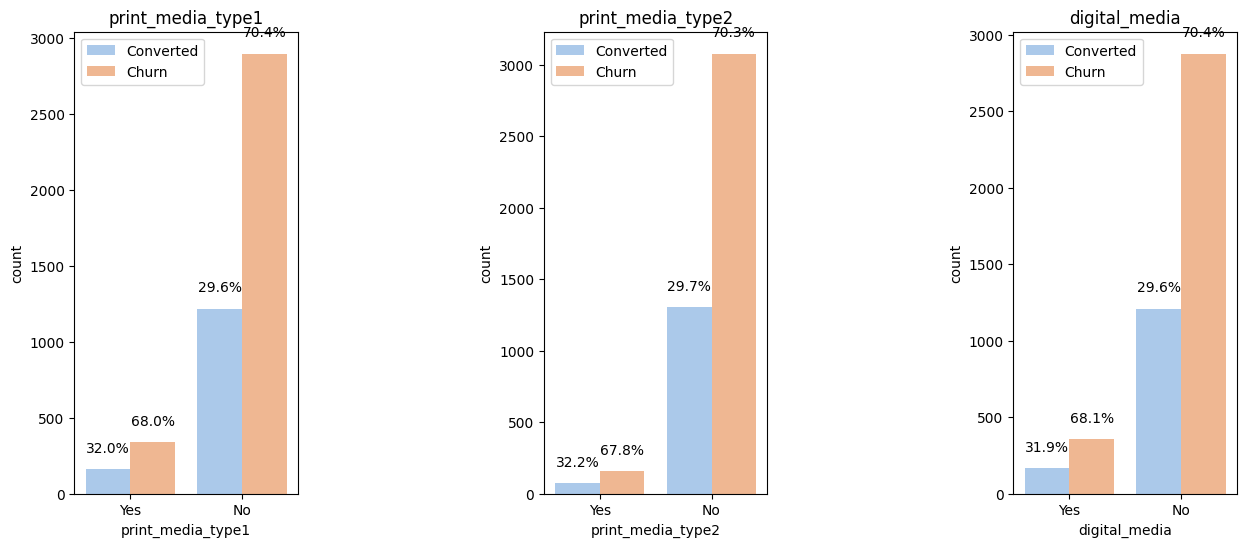

In [ ]:
"""
Plotting Media campaigns performance
"""
fig, axes = plt.subplots(
        ncols = 3,  # Number of columns of the subplot grid
        nrows=1, # Number of rows of the subplot grid
        #sharex=True,  # The X-axis shouldn't be shared here, as each plot might have different x-values
        figsize=(15, 6) # figsize is used to make the figure larger as needed
    )

# set the spacing between subplots
plt.subplots_adjust(wspace=1.1,
                    hspace=0.4)

# add the countplots to the subplots grid
media_cols =['print_media_type1', 'print_media_type2', 'digital_media']
status_order = [1,0]
campaign_order=['Yes', 'No']

for column, axes in zip(media_cols, axes.reshape(-1)): # iterating over dictionary dataframes defined above and axes of the subplots simultenously to assign countplots to the the subplots grid
  ax = sns.countplot(ax = axes, x=data[column], hue = data['status'], order=campaign_order,hue_order=status_order, palette='pastel')
  axes.set_title(column)
  axes.legend(['Converted', 'Churn']) # change the labels
  with_cat_var_percent(axes, data, column, campaign_order)

**Answer to Question 4:** *The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?*

This representation gets us a good overall sense of our 3 type of campaigns. As we already know most leads were captured with alternate methods that are not media.

For those who were captured thanks to these campaigns, this representation is not very satisfying as it doesn't show us the conversion rate. It also doesn't show the effect of combining media campaigns together.
Let's keep going with another representation to finalize answering the question.

In [ ]:
"""
Let's reuse our code cell #24.

Let's plot the performance of our campaigns and comnibations and check conversion rate
"""
# Let's initiate an empty dict that we'll fill below with the different combinations of media types and their
# associated conversation rate
media_conv_dict = {}
# all media campaigns possible combinations
media_type = ['news_mag_digi', 'mag_digi', 'news_digi', 'news_mag', 'news', 'mag', 'digi', 'nomedia']

# Iterate over all media type, and calculate associated conversion rate
for campaign in media_type:
  media_conv_dict[campaign] = '{:.0%}'.format(media[eval(f'mask_{campaign}') & media['status']==1].shape[0]/media[eval(f'mask_{campaign}')].shape[0])
media_conv = pd.DataFrame(data = media_conv_dict, index=[0]) # Convert into a one row dataframe for ease of display
media_conv

,news_mag_digi,mag_digi,news_digi,news_mag,news,mag,digi,nomedia
0,50%,41%,38%,30%,31%,31%,30%,29%


**Observations:**
* When combining all 3 media campaigns together, the conversion rate goes to the highest, at 50%. We can argue that this is only based on a very small sample of 4 leads, and would have to see if that trend follows with more leads.
* When targeting with a combination of two media campaigns, we do see magazine and digital ranking higher at 41% conversion rate, news and digital combined are close at 38%. Without digital, the conversion rate goes down to 30%
* When our leads only see one media campaign, the performance is around 30%, which is equal to the leads who didn't see any media campaign. When our leads only see one media campaign, our conversion rate shows no improvement vs. doing nothing.

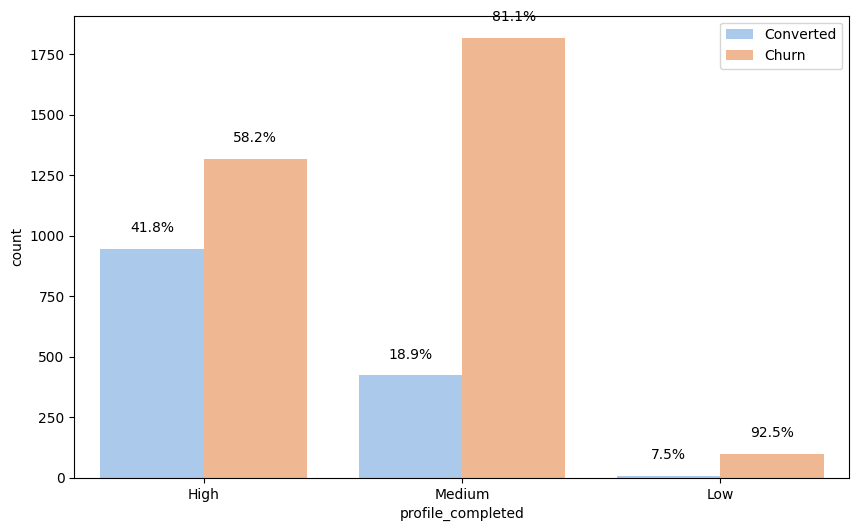

In [ ]:
"""
Plotting profile completion by status outcome
"""

status_order = [1,0]

category_order = data['profile_completed'].value_counts().index.tolist()

plt.figure(figsize = (10, 6))

ax = sns.countplot(x = data['profile_completed'], order=category_order, hue = data['status'], hue_order=status_order, palette='pastel')

with_cat_var_percent(ax, data, 'profile_completed', category_order)

plt.legend(['Converted', 'Churn'])

plt.show()

**Answer to Quetsion 5**: *People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?*

* We see a very clear trend here: when profile completion goes up, conversion rate increases in a very significant way
* from our low profile completion and its score of 7.5% conversion rate, we go up to 19% with medium profile information and all the way up to 42% with high profile completion.
* we recall that low profile completion is extremely rare, so the very insightful information here is that by going from medium to high profile completion for our leads, we succeed in more than doubling our conversion rate.


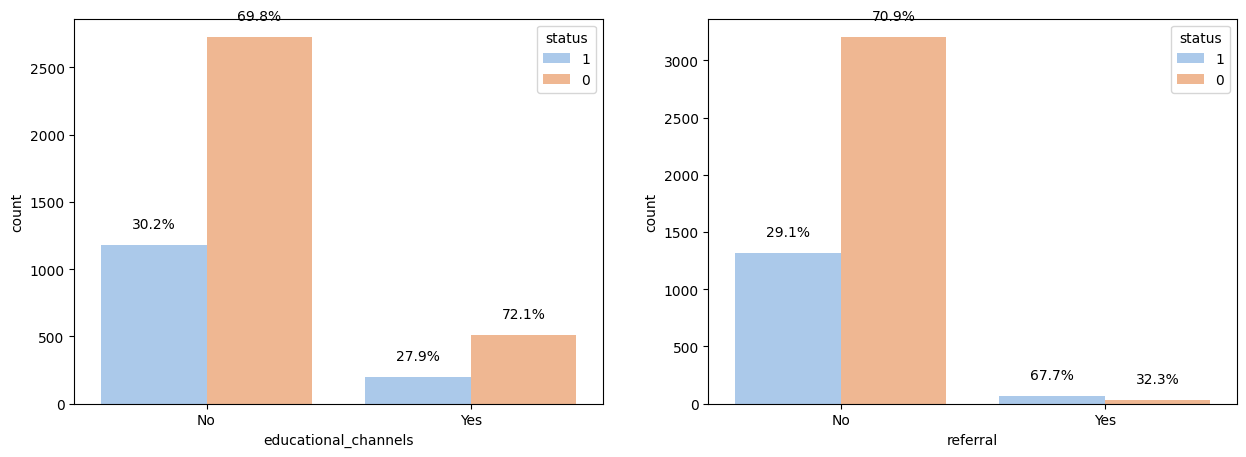

In [ ]:
# plotting our 2 last categorical variables to assess impact on conversion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
status_order = [1,0]

sns.countplot(data=data, x='educational_channels', hue='status', hue_order=status_order, ax=ax1)
with_cat_var_percent(ax1, data, 'educational_channels', ['No', 'Yes'])

sns.countplot(data=data, x='referral', hue='status',hue_order=status_order, ax=ax2)
with_cat_var_percent(ax2, data, 'referral',  ['No', 'Yes'])

**Observations**:
* education channel doesn't yield much insight, outside of the low volume of 'Yes' that we already flagged earlier in our EDA.
* `referral` not suprisingly does improve the conversion rate, but it's a very insignificant part of our population, so it can't have a major impact on our business so far.

<Figure size 1000x600 with 0 Axes>

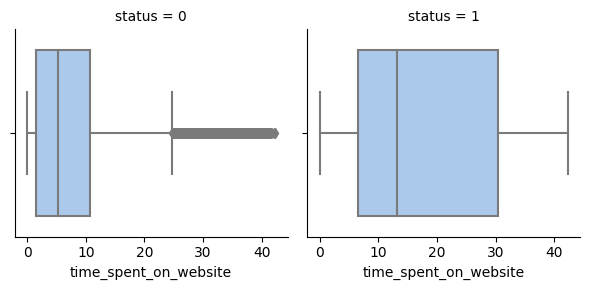

In [ ]:
# plotting time_spent_on_website with seaborn library
plt.figure(figsize = (10, 6))
fig = sns.FacetGrid(data, col="status")
fig.map(sns.boxplot, "time_spent_on_website");

**Observations:**
* this plot is interesting and shows us a clear trend here: churners tend to spent a much lesser amount of time on the website which makes sense. The vast majority of churners spends less than 10 minutes on the website
* Other interesting fact on churners is that we do have a big amount of outliers, which tend to confirm our initial assumption that we might have an issue with the tagging on our website. Again, this happens a lot in real life, and is not something surprising to me.
* our converted leads population on the other hand has a much bigger spread of time spent on the website, and the vast majority of these leads spend more than 10' on the website up to more than 40 minutes.
* This variable seems to have a good predicting potential on the full dataset to tell us if a lead will convert of churn.

<Axes: xlabel='status', ylabel='website_visits'>

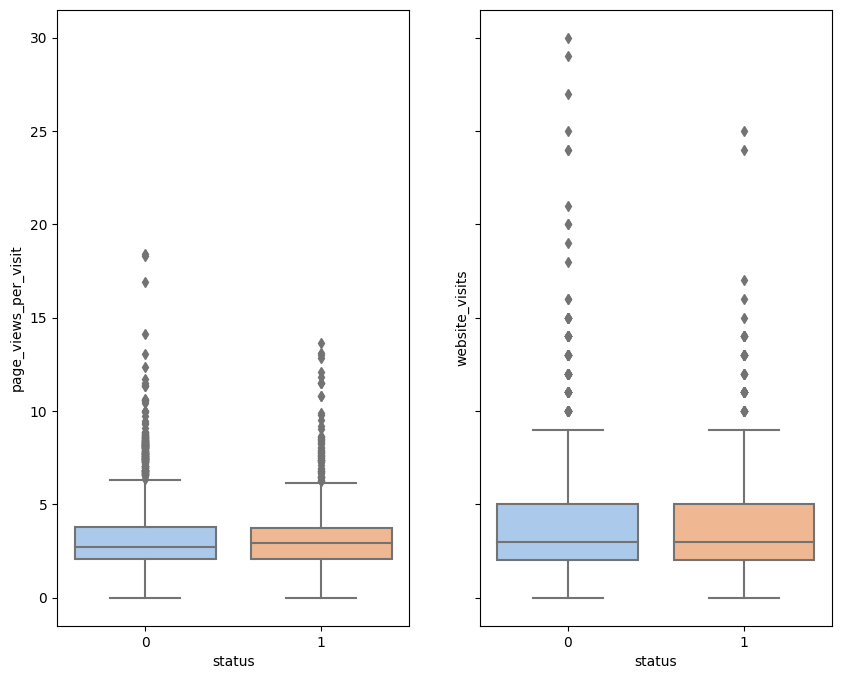

In [ ]:
# plotting the other two numerical varialbles in a similar way
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 8))

#fig = sns.FacetGrid(data, col="status")
sns.boxplot(data=data, x='status', y='page_views_per_visit', ax=ax1)
sns.boxplot(data=data, x='status', y='website_visits', ax=ax2)

**Observations:**
* Distributions for both churners and converted leads are similar in terms of pages viewed per visit, and website visits.
* That basically tells us that these variables won't be picked as a first or second node in our decision tree. As intuitively, we tend to expect these variables to impact the outcome of churning or converting, we anticipate these will be added later in the tree, more in depth inside the tree, when the population of leads is already subdivided by other variables.
* Both variables display a big amount of outliers which I am not very comfortable with. The best solution here would be to talk to the team in charge of collecting the data. I would not remove these outliers until we're 100% sure these are issues, the amounts are not disconnected from reality, so we prefer to keep them in this exercise.

### <a id='eda'>Summary of EDA</a>

**Data Description:**
- There are **4612 observations and 15 columns** in the dataset.
- All the columns are filled with values, i.e., **there are no missing values in the data.**
- The **`ID` identifier column is unique**, and therefore dropped from the dataset, it won't add any value to our analysis.

**Observations from EDA:**

- our target variable `status` is composed of zeros, which are our churners, and ones, which are our converted leads to customers. Our dataset is imbalanced towards the churners category, representing 70% of our entire dataset. We'll have to take that into account in our classification problem.
- `time_spent_on_website` is in seconds and will be more relevant for our analysis in minutes, so we've made the conversion.
- The average age of our leads is more than 46, with a majority of our leads that tend to convert being from professionals or unemployed employment categories. This is an important insight which means ExtraaLearn should definitely focus on this population in its task to increase its conversion rate.
- Our numerical variable `time_spent_on_website` wich average is 12 minutes seems to be impacting the outcome of churners and converters. We anticipate this variable will be picked early on in the decision tree, along with the current occupation of our leads.
- `website_visits` and `pages_viewed_per_visit` show an important amount of outliers. We will only clean 3 outliers of the latter variable, that seem out of range, but for the rest would rely on asking the data team how the data collection was conducted, and the tagging process success rate, to ensure these are not issues in our dataset.
- we found in the dataset what seems to be data quality issues, i.e., 7 data points show no page viewed on the website, and non-zero website visits and time spent on the website which is not possible unless the definition of pages viewed on the website excludes landing pages for example. That would be another question to the data team, to ensure we don't need to fix the data before fitting our model.
- The whole media strategy proved to be overall not successful. First our newspaper, magazine and digital campaigns only target between 5 and 10% of the lead population, a minority then. We also saw that whenever these media campaigns are launched individually the conversion rate is flat vs. the no media population, at 30%. We saw that combining media campaigns had a positive impact though, going up to around 40% when combining digital with news or magazine campaigns, and up to 50% when all 3 campaigns are seen by the lead. Definitely something to share to the media team!
-  The channel of interaction with our leads proved to be also an important factor in being able to convert them. The website so far is great, and has a 46% conversion rate, vs. only 10% on the phone! This is a big warning to share to ExtraaLearn, improve your experience on the phone, it accounts for 50% of your traffic!
- Other variables proved to also be impacting the conversion rate. Profile completion for instance definitely increases our chances of conversion, for instance when a profile is fully completed vs. medium completed.
- It also seems we're doing a better job by email with 30% conversion rate for half the traffic. Again the website is also showing a great conversion rate at 34%. The phone comes third at 24% which we find odd. Usually the experience on the phone has to be better and should increase conversion rate. this feedback should be shared to ExtraaLearn and their customer service team.
- Finally we saw that ExtraaLearn brand is not well known yet, with only 15% of the leads having heard of the platform before. And that the referral system in place is not yet very efficient, only 2% of the leads were referrals, to be improved, knowing that referrals are shown to impact positively the conversion rate.   

## <font color='blue'>Data Preprocessing</font>

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Modifying our three outlier values of number of pages viewed on the website to the upper whisker value
# Calculating the 25th quantile
Q1 = data["page_views_per_visit"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["page_views_per_visit"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR

# Assigning the value of upper whisker to outliers
data.loc[data['page_views_per_visit'] >15, 'page_views_per_visit'] = Upper_Whisker

**Observation:** we treated our 3 outlier points above. As explained before, in a real life situation, I would have asked more information on how this data was captured. It's possible that these value are correct. Getting rid of outliers when they are correct data points would impact negatively the quality of our model.

In [ ]:
# Separating the target variable and other variables
X = data.drop(columns = 'status')
Y = data['status']

In [ ]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, columns= to_get_dummies_for, drop_first = True)

# Mapping overtime and attrition
dict = {'Yes': 1, 'No': 0}

# Creating a list of columns for which we will apply the dictionary mapping above
to_get_binaries_for = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for column in to_get_binaries_for:
  X[column] = X[column].map(dict)

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## <font color='blue'>Building a Decision Tree model</font>


**A few notes on the strategy of building our model:**

* False Positive: the lead is identified as a future converted customer by the predictor, but is in fact going to churn
* False Negative: the lead is identified as a future churner when it should in fact convert into a paid customer

* Both cases are important here, even though the false negative is even more important to try to reduce.
* If it is a false positive, our call center will dedicate resources and time on a customer that is not really interested in the program, and has higher chances to churn.
* If it a false negative, we're not going to focus resources and time on a potential future client, which is a missed opportunity for additional revenue. As a growing startup, this is definitely very important

* We will therefore look closely at the f-1 score of our converted class by keeping a close eye to the recall as well. Ideally we would want to maximize these two metrics.

In [ ]:
# Fitting the decision tree classifier on the training data, criterion by default is Gini
d_tree =  DecisionTreeClassifier(random_state = 1)

# fitting the model defined above to our train dataset
d_tree.fit(X_train, y_train)
# in the same way we wanted a deterministic outcome for our data splitted into test and train datasets,
# we also want our decision tree to return similar results if we rerun the code over and over. We set random_state to 1 to ensure for this.

DecisionTreeClassifier(random_state=1)

## <font color='blue'>Model Performance evaluation and improvement</font>


In [ ]:
# Let's reuse the great piece of code provided in previous case studies
# the function prints a classification report and geta a confusion matrix in a proper format

def metrics_score(actual, predicted):
    # calling the classification report that will give us performance metrics such as recall, precision and f-1 score
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    # creating a heatmap to represent more visually the confusion matrix
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Churned', 'Converted'], yticklabels = ['Churned', 'Converted'])

    # adding y and x labels on the heatmap
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



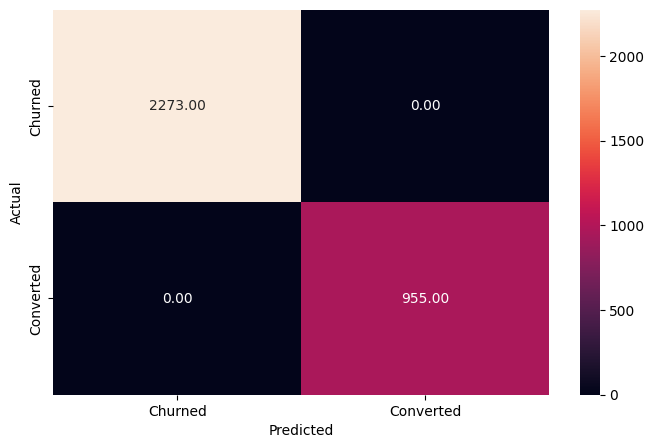

In [ ]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:**
* The decision tree classified all data points from the training set correctly, getting a perfect score on all metrics, i.e., precision, recall and f-1 score
* Unfortunately, there's good chances our decision tree is overfitting the training data, which happens very often when decision trees are not penalized for growing as much as they want.

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       962
           1       0.71      0.70      0.70       422

    accuracy                           0.82      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.82      0.82      0.82      1384



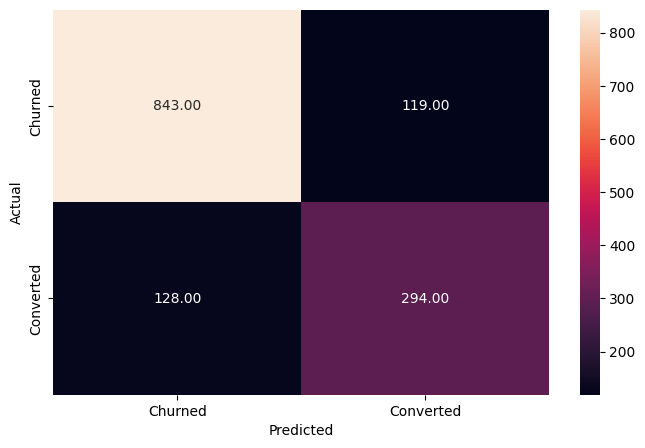

In [ ]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

* As expected the decision tree model was overfitting the training data as the results here are not as good as we would expect. It didn't generalize well to the test data.
* The precision of 0.69 and recall of 0.7 on our target class of converted leads is not good enough, even less considering the gap with our training dataset that was 100% for both metrics.
* The f-1 score which is a combination of our precision and recall is at 70% which we are confident we can improve.
* Our EDA showed us that our dataset was imbalanced towards the population of leads churning. Let's account for this in our next model

## <font color='blue'>Building a Decision Tree model w/ weights</font>


**A few notes on the strategy of building our model:**

* the Sklearn DecisionTreeClassifier() comes w/ the parameter `class_weight` that allows us to adjust the weighting and adjust the imbalance found in the dataset
* Our dataset had 70% of our leads population that would eventually churn vs. 30% that would convert into paid customers. We can pas the dictionary `{0:0.30, 1:0.70}` to the model, to give more weight to our converters class.

In [ ]:
# Fitting the decision tree classifier on the training data, criterion by default is Gini
d_tree_w =  DecisionTreeClassifier(class_weight={0:0.30, 1:0.70}, random_state = 1)

# fitting the model defined above to our train dataset
d_tree_w.fit(X_train, y_train)
# in the same way we wanted a deterministic outcome for our data splitted into test and train datasets,
# we also want our decision tree to stay similar if we rerun the code over and over. We set random_state to 1 to ensure for this

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

## <font color='blue'>Model Performance evaluation and improvement</font>


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



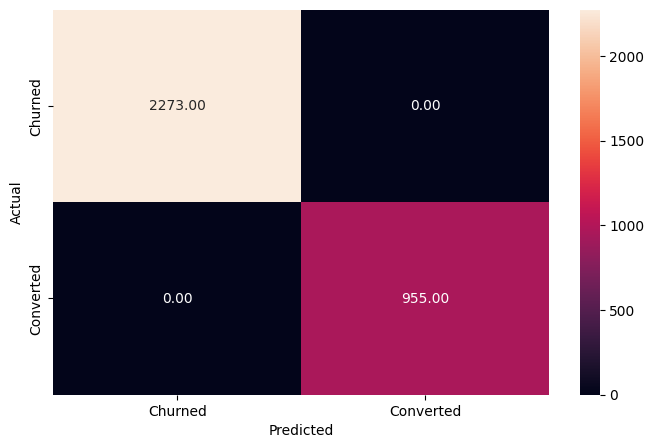

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_w.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:**
* The decision tree still classified all data points from the training set correctly, getting a perfect score of 100% on all metrics, i.e., precision, recall and f-1 score
* Unfortunately, there's still good chances our decision tree is overfitting the training data.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       962
           1       0.68      0.68      0.68       422

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



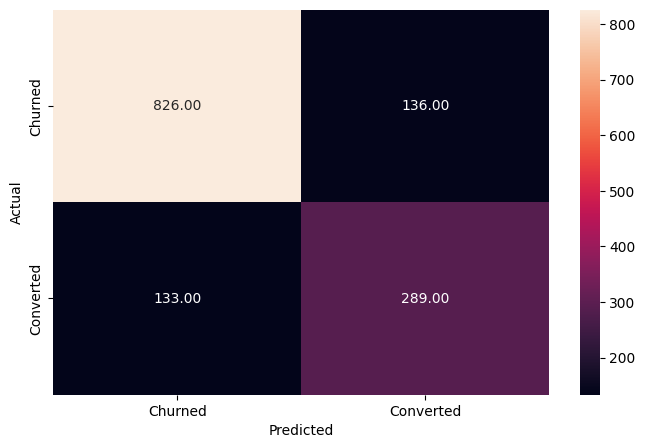

In [ ]:
# Checking performance on the testing data
y_pred_test2 = d_tree_w.predict(X_test)

metrics_score(y_test, y_pred_test2)

* As expected the decision tree model was still overfitting the training data as the results here are not as good as we would expect when applied to the test dataset. It didn't generalize well to the test data.
* The precision of 0.68 and recall of 0.68 dropped vs our previous tree.
* we wonder now why we would keep this decision tree vs. the non-weighted one? In real life I would have skipped the first decision tree, but for exercise purposes I kept it. We will keep the weighted decision tree because it accounts for the inbalance in our dataset and will perform better on real data. The fact that f-1 score dropped just means we need to keep working and find a better model.

## <font color='blue'>Tuning our weighted decision tree</font>


In [ ]:
# Choose the type of classifier
d_tree_w_tuned = DecisionTreeClassifier(class_weight={0:0.30, 1:0.70}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_w_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_w_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_w_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=5, min_samples_leaf=20, random_state=1)

we see here that the best parameters found by the grid search for our previous decision tree are:
* `criterion` = 'entropy'
* `max_depth`= 5
* `min_samples_leaf` = 20

## <font color='blue'>Model Performance evaluation and improvement</font>


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.69      0.87      0.77       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.85      3228



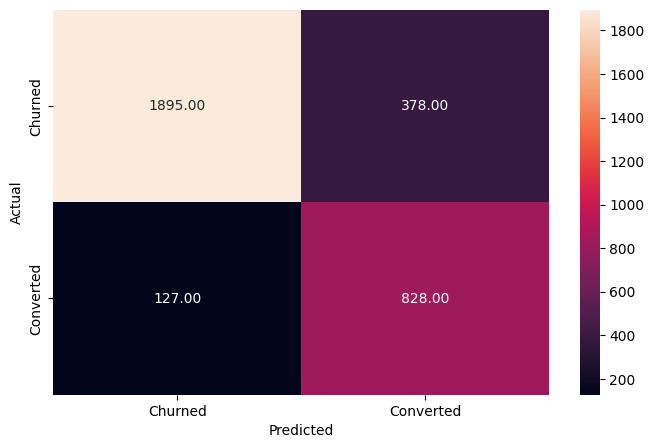

In [ ]:
# Checking performance on the training data
y_pred_train3 = d_tree_w_tuned.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:**
* The decision tree performance here is not 100% as opposed to our previous decision trees on the training dataset.
* The recall score of 87% and f-1 score of 77% seem to be worst compared to the 100% we had on our training dataset before. But again, what matters is the comparison with the test dataset. We want to have closer values between training and test datasets to avoid overfitting.

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       962
           1       0.70      0.84      0.76       422

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.84      0.84      1384



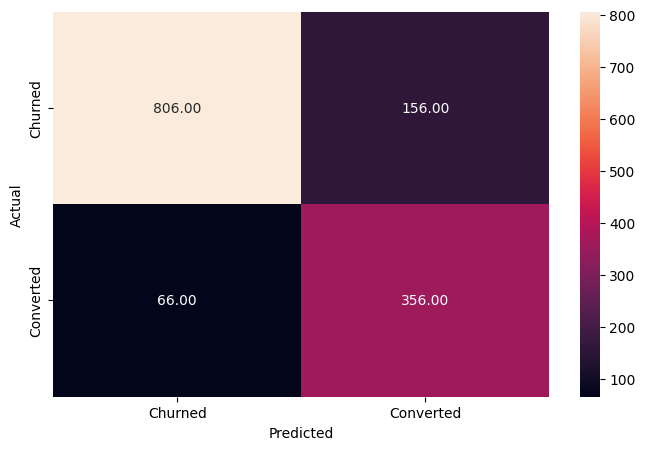

In [ ]:
# Checking performance on the testing data
y_pred_test3 = d_tree_w_tuned.predict(X_test)

metrics_score(y_test, y_pred_test3)

* The results of this tuned model are satisfying compared to the non-tuned decision tree model. First we reduced the performance gap significantly between our training dataset which f-1 score is 77% and our test dataset, which f-1 score is 76%.
* Recall and precision scores are also much closer between test and training datasets, at respectively 1pt difference and 3pts difference.
* We also improved our performance vs. the non-tuned decision tree. our f-1 score went from 68% to 76% which is a significant improvement. The global accuracy of the model also increased 3 percentage pts to 84%
* Last highlight is the recall score which we're particularly focused on in our context, that one improved from 68% to 84%.
* This model is much better than the previous one, let's analyze it into further detail in the next section.

## <font color='blue'>Decision tree model evaluation</font>


* So far, we've run 3 versions of our decision tree model, a non-weighted one, a weighted one and a tuned weighted one. We'll keep our third tuned decision tree model as it significantly improved the overall performance of the model.
* For the sake of interpretability and avoid the "what is a decision tree?", awaiting the even less explainable random forest that's coming after, we'll show what this tuned decision tree looks like and explain to ExtraaLearn team that our random forest model in the next section will just be an aggregation over multiple trees like this one.

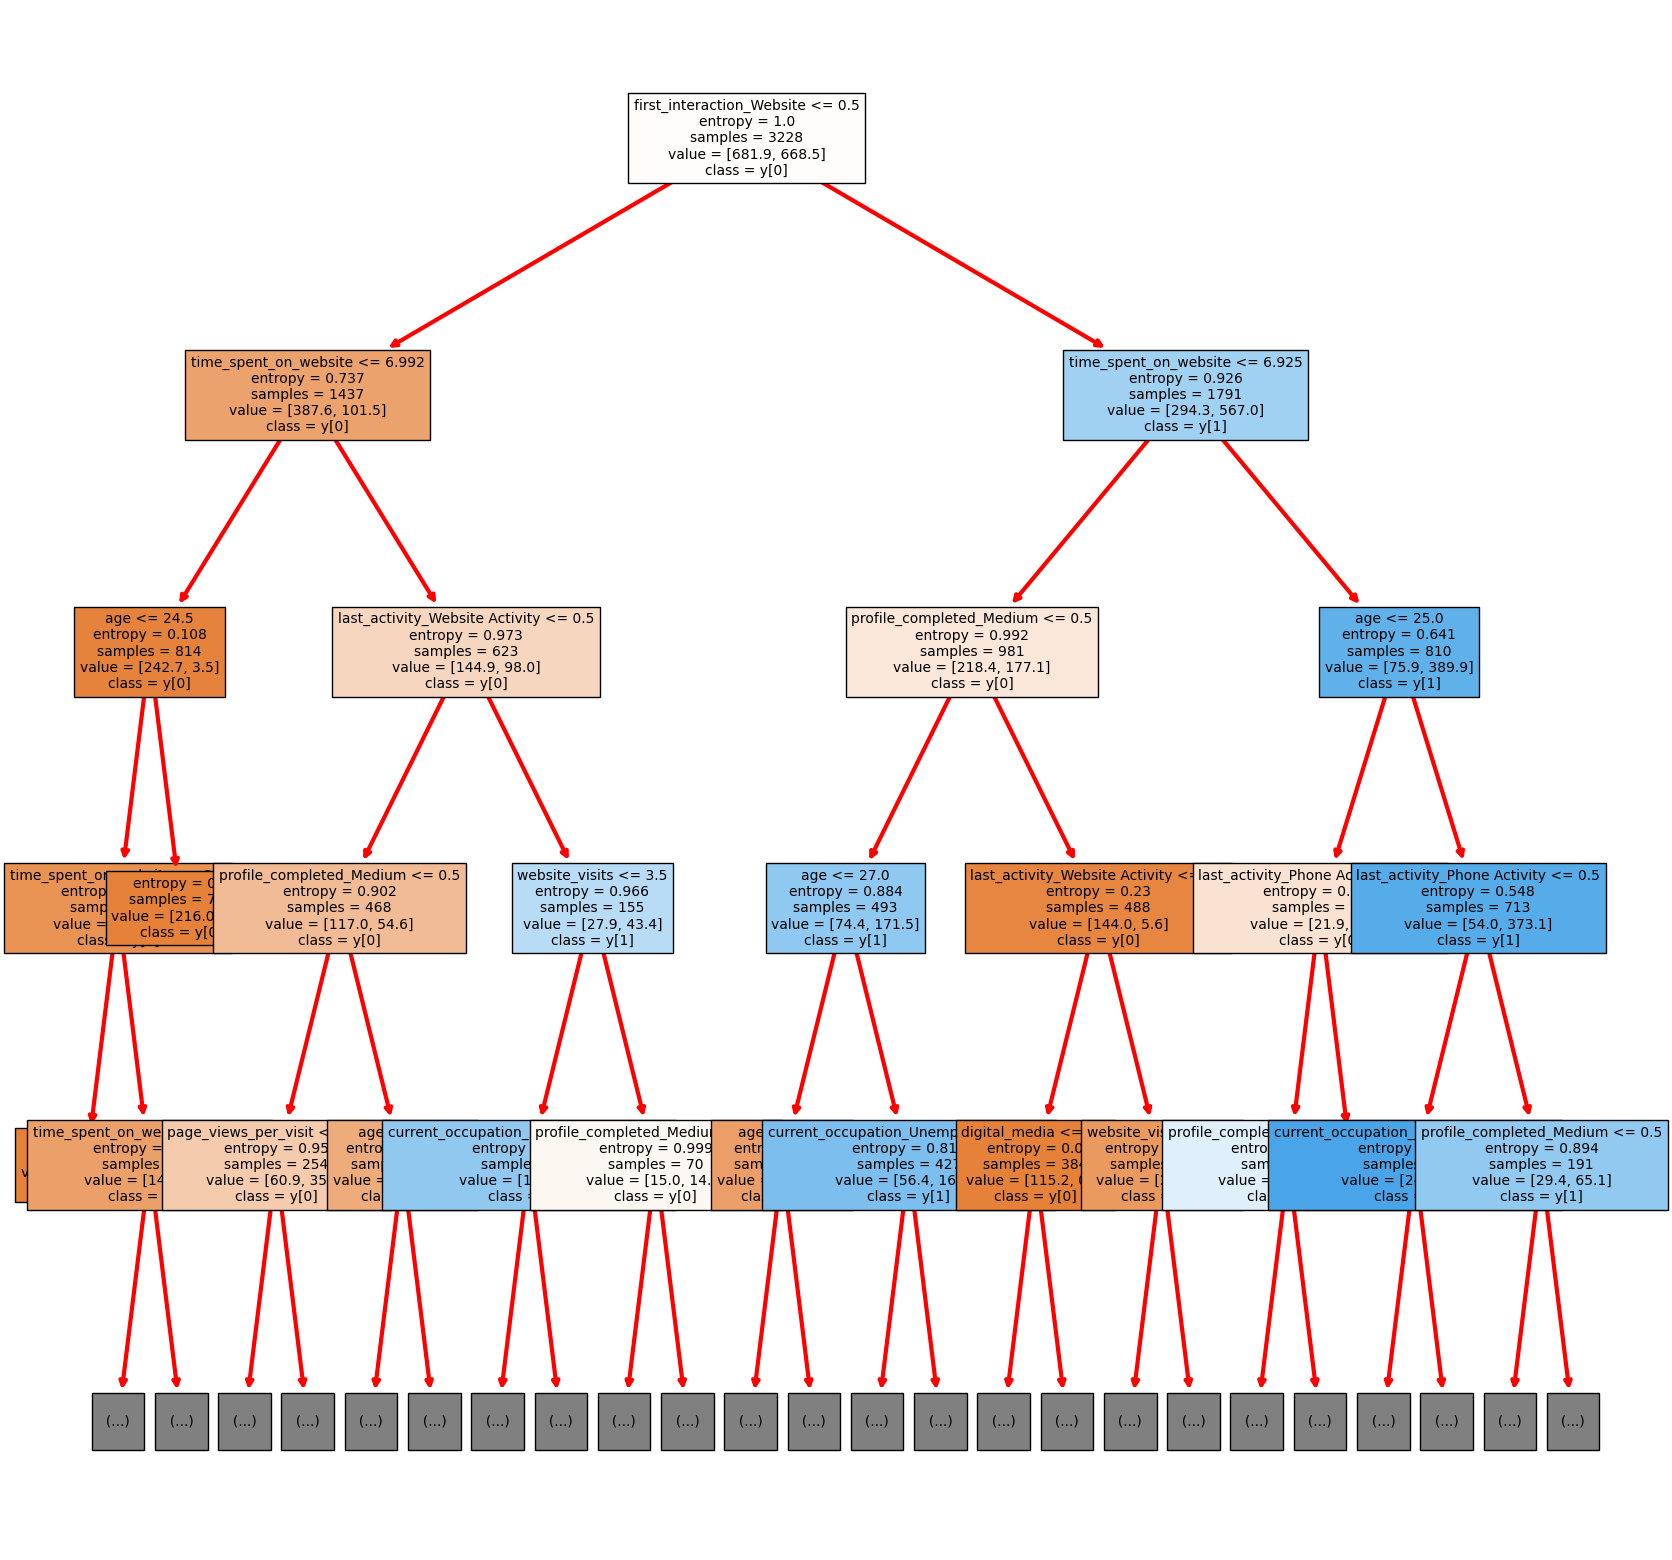

In [ ]:
# Plotting our decision tree with plot_tree
fig, ax = plt.subplots(figsize = (20, 20))

# we decide some extra information in our nodes such as feature_name, the majority class, and the will only display a depth of 4 nodes
out = tree.plot_tree(d_tree_w_tuned,feature_names=X.columns, max_depth=4, filled = True, class_names=True, fontsize = 10)

for o in out:

    arrow = o.arrow_patch

    if arrow is not None:
        arrow.set_edgecolor('red')

        arrow.set_linewidth(3)

plt.show()

* This decision tree is very understandable and easy to interpret. The first node separates leads who basically first interacted with the website vs. others that interacted with the phone. We saw in the EDA that this variable seemed to impact the outcome of our leads converting or not, this is confirmed here.
* We also see that the left part of the tree which are basically leads that first interacted on the phone shows many more churners nodes (red color) than the right part (blue color).  
* The initial sample is 3228 which corresponds to our train dataset, and is equally represented with 682 leads that will churn, and 668.5 that will convert. Note this is a result of the weighting that increased the weight of our converted leads that are under-represented in this dataset (if we were to show the non-weighted tree, we would have a much bigger proportion of churners in that first node, and also no decimals)
* We then go to the next node seeing the next range of features chosen, and so on. The colors tell us about the categories, and how we end up getting to purer subsets of population. purer standing for homogeneous.  

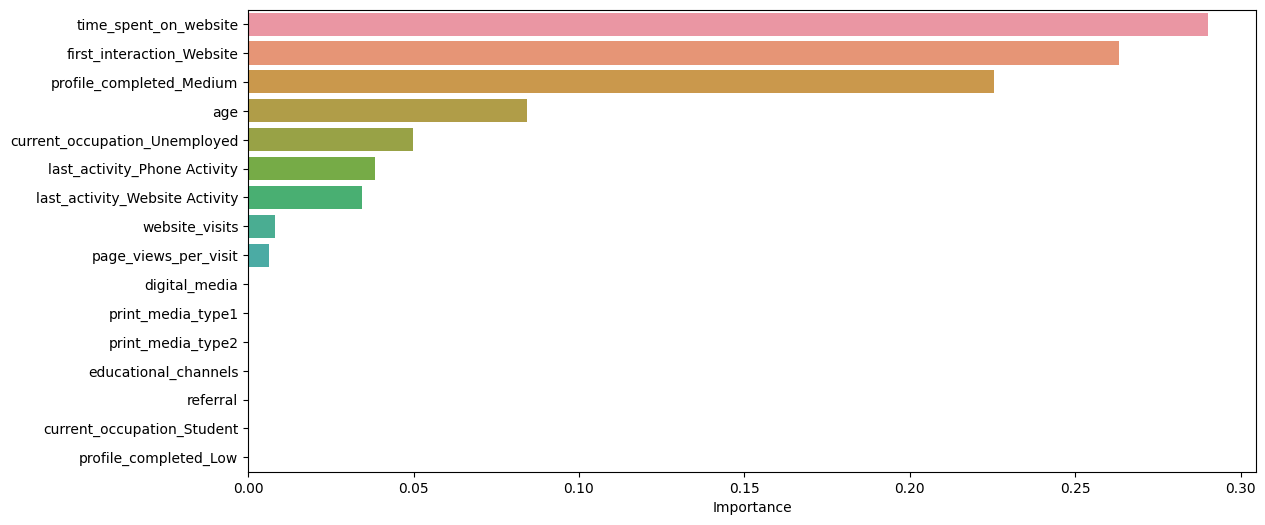

In [ ]:
# displaying the important variables on our chosen model rf_estimator_tuned
importances = d_tree_w_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 6))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

Another insightful element we can share to ExtraaLearn at this point are the variables of importance of our decision tree, meaning those that most impacted it:
* We see that the time spent on the website, the first interaction channel, and the profile completion are the 3 most important factors impacting our decision tree. They account for almost 80% of the importance of our model. We saw in the EDA that the website was a solid channel in converting our customers, we also saw the importance of a fully completed profile which logically helps the customer service team follow-up with more personalized learning recommendations.   
* The age comes next a little bit under 10%, followed by last interaction with our customer service happening by phone or chat on the website. At the very last, we find website visits, and page_views_per_visit. The age is also a proxy for our variable `current_occupation` as older people tend to already be working professionals, vs. young people tend to be more students. That confirms that our product appeals to older leads, that tend to be working professionals or unemployed.
* we see that neither of our media campaigns, referrals, educations channels, students and low profile completion impacted our decision tree. Nothing surprising here either. We were unsatisfied with the conversion rate of our media campaigns, this is a logical reason for it.

## <font color='blue'>Building a Random Forest model</font>


* Random forest are extremy powerful predictors, that average out predictions of multiple decision trees.
* We learnt during case studies that it is a classifier that we should always try in a classification problem as it's usually amongst the best performing predictors v. other models.
* Our previous tuned decision tree highlighted interesting conclusions and a good overall performance, but we can easily fall into a local optima with single decision trees. Random forest should protect us from that by aggregating several decision trees.

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight={0:0.30, 1:0.70}, criterion = "entropy", random_state = 1)
# for this sklearn function the criterion defaults to 'squared_error',
# so we change it to entropy to be consistent with our previous trees.

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       random_state=1)

## <font color='blue'>Model Performance evaluation and improvement</font>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



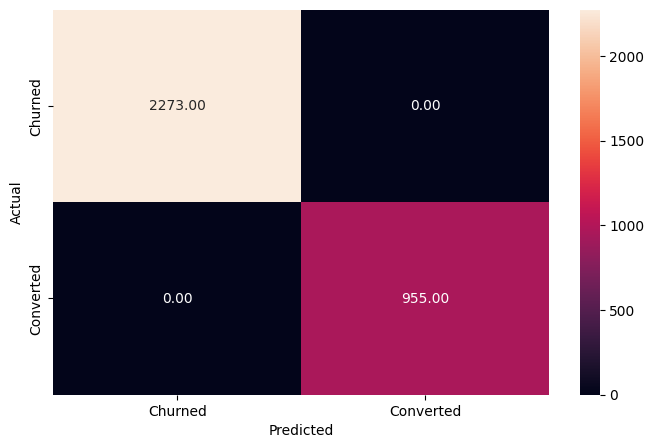

In [ ]:
# Checking performance on the training data
y_pred_train4 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
* The random forest classified all data points from the training set correctly, getting a perfect score of 100% on all metrics, i.e., precision, recall and f-1 score. As previously explained, that could mean our model is overfitting the training dataset.

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.79      0.69      0.73       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.85      0.85      0.85      1384



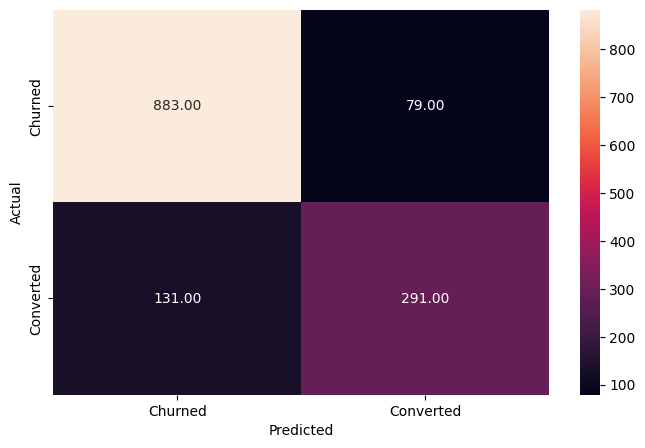

In [ ]:
# Checking performance on the testing data
y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations:**
* Overall this model is not as good as our tuned single decision tree. First the gap with the train dataset is wider, which could mean we're overfitting our training dataset.  
* The f-1 score went down 3 points. Even though we improved our precision from 70% to 79%, we went down for the recall from 84% to 69%.
* Recall in combination with f-1 score are our most important KPIs. We keep our tuned decision tree for now.

## <font color='blue'>Tuning the Random Forest model</font>


In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.30, 1:0.70}, criterion = "entropy", random_state = 1)

# Grid of parameters to choose from
# we're using parameters that worked well in previous mentored learning sessions
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1, our converted class
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search with different parameters
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
# fit the new rf_estimator_tuned

rf_estimator_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_features='auto', min_samples_leaf=3,
                       n_estimators=500, random_state=1)

we see here that the best random forest found by the grid search was:
* `max_features` = 'auto'
*` n_estimators` = 500
* `min_samples_leaf` = 3

## <font color='blue'>Model Performance evaluation and improvement</font>

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2273
           1       0.86      0.94      0.90       955

    accuracy                           0.94      3228
   macro avg       0.92      0.94      0.93      3228
weighted avg       0.94      0.94      0.94      3228



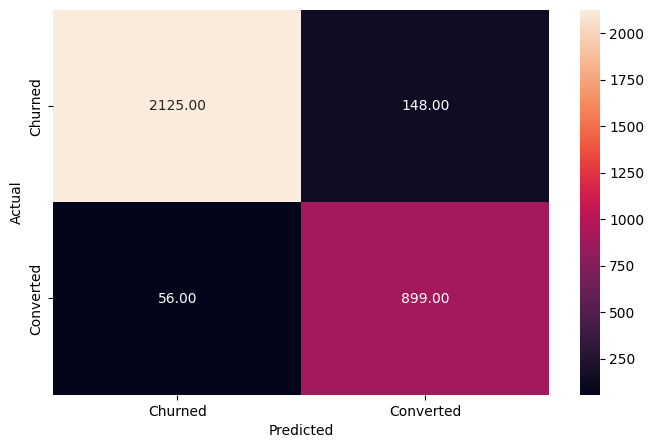

In [ ]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:**
* The decision tree has an excellent overall performance, with a recall of 94%, an f-1 score of 90% and an overall accuracy of 94%.
* Let's see if we can get the same performance when applying our model to the test dataset.

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       962
           1       0.77      0.76      0.77       422

    accuracy                           0.86      1384
   macro avg       0.83      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



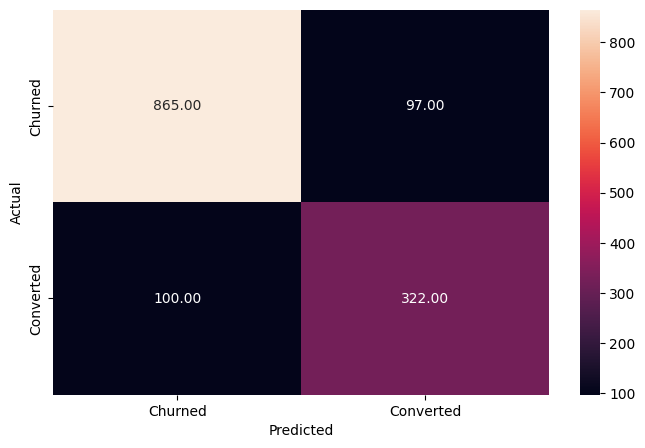

In [ ]:
# Checking performance on the testing data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**
* The tuned random forest is actually yielding satisfying results. The gap with the training dataset is narrowed compared to the non-tuned random forest. the gap in accuracy is 8 pts, same for recall. The f-1 score is bit bigger at 13 pts though.
* Compared to our tuned decision tree, the precision when up 7pts which is significant, and the f-1 score went up 1 pts. The recall went down to 76% from 84%. Our overall accuracy went up 2 pts.
* The two models are fairly similar in terms of overall f1-score and accuracy, the main difference is in precision and recall that is more balanced in the random forest model, vs. our tuned decision tree is outperforming recall and underperforming the precision.


## <font color='blue'>Random forest tree model evaluation</font>

* The random forest model yielded a good overall performance in its tuned version. We yielded 77% f-1 score on the converted class, and a balanced recall and precision score at respectively 77% and 76%.
* Overall the tuned random forest model improved the f-1 score by 1 pts, but we consistently reduced our recall and improved our precision. The tuned random forest is more balanced between miss-classifying false negatives and false positives.
* For equivalent f-1 scores at just 1 pt difference, I would rather have a model that predicts my converted leads in a version that reduces the number of false negatives. That is our first single decision tree model. Random forest models are also more heavy computationally as they require calculating multiple models which weights on my decision too. Our tuned random forest took significantly more time to run vs. the tuned decision tree.
* Only concerns we can have with a single decision tree is that it could have overfitted our training dataset and we could have been lucky applying it to the current relativelly small test dataset and yielding good performance results, so it will be worth monitoring the consistency of this performance as we grow our population of leads.

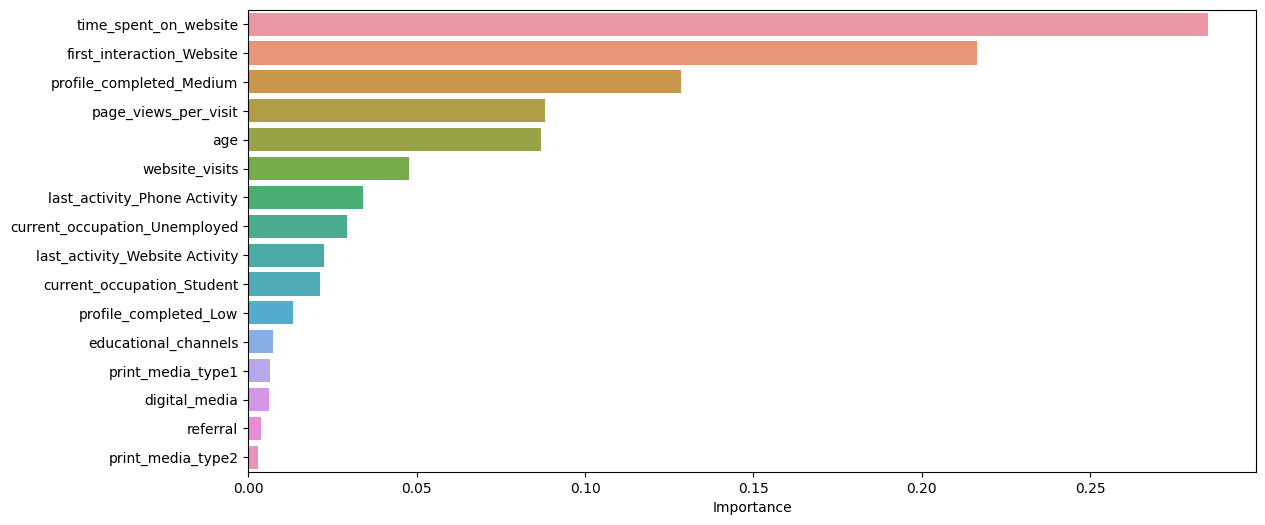

In [ ]:
# displaying the important variables on our chosen model rf_estimator_tuned
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 6))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

Let's see what many aggregated decision trees in our random forest found as important features in our dataset.
* The top 3 features are still The time spent on the website, first interaction channel and profile completion that have similar percentages as before.
* This time the `page_views_per_visit` comes higher in our ranking at close to 10% vs. less than 2% before.  We remember that we found potential outliers and data quality issues, so knowing that this variable impacts our random forest model more importantly, we reiterate the importance of meeting the data engineering team to validate data quality.
* Age is also confirmed as an important feature at close to 10%.
* Last activity with our customer service on phone and website are fairly equal than our tuned single decision tree.  

So then come different features that have changed slightly vs; our previous model, let's highlight them separately:
* the number of website visits went slightly up in importance in the random forest
* the media campaigns, referrals and education channels this time had an impact on our model, but the percentage is still very small and somehow not significant.

Overall, we're satisfied with the outcome of the random forest that confirms the most important features in our single decision tree model impacting the conversion rate.

## <font color='blue'>Actionable Insights & Recommendations</font>

1. we built a **classifier model that can help ExtraaLearn predict if our customers will be churners or converted customers with an f-1 score of 77% and a recall of 87%**.
>This means that out of all leads that will convert into paying customers, which will bring revenue to our company, our model will have detected close to 9 out of ten correctly. The downside of our choice to focus on recall and f-1 score is that we may classify wrongly some leads as future converters when they will actually churn. At least we're not missing on revenue opportunities. As we grow our database of leads, we hope we can improve the overall f-1 score and precision at above 80%.

2. we saw that the **time spent on the website is the most important factor in getting our leads to convert**. This is not surprising, when the customer takes the time to read the content on our website, it does show a higher interest on our programs and therefore increases chance of conversion.

3. The **website channel is also our strong channel that helps converting our leads**.
>The organization should keep working on their website, improving its content, adding more videos and comments from previous alumni. As a result we also saw that the mobile experience is very bad, and absolutely needs to be improved as it accounts for half the traffic.

4. O**ur program mostly appeals to older people (not retired though), that are either working professionals or unemployed**.
>This should really help shape ExtraaLearn's strategy in the future. Either by solely targeting these individuals and become more of a niche education product, or by deciding to expand our attractiveness to students by adding more programs.

5. **Profile completion matters, when we get a fully completed profile vs. medium we do increase our chances of converting our leads**.
> ExtraaLearn should put a strategy in place to ensure we get all our customers to fully complete their profile.

6. **The channel of interaction of our customer service team is also a factor of conversion but at a lesser degree than the previously mentioned features**. The written channels such as email and chat do contribute to a higher conversion rate. The phone is not as good of a factor for conversion rate.
> I would do a follow-up analysis with the customer service team to understand how we can improve the phone channel experience to ultimately improve conversion rate.

7. **Our media strategy so far has not been successful**. The amount of leads targeted is too small at below 10%, and when targeted we couldn't see a real improvement in the conversion rate vs. non targeted leads. In the model, media variables convey the same results, they're not important factors in the conversion prediction.
>We saw a potential quick win idea, that would consist in combining these media campaigns. Improving the media strategy is key here as a way to continue improving our conversion rate.

8. **Our EDA showed potential data quality issues** that I would absolutely question with the data team in charge of collecting this dataset. If the data is not accurate, our model won't be either.

9.  **Referral doesn't seem to be an important factor in our model**, we wonder if that's due to the very low amount of leads referred to us, at `2%` of our whole dataset. We saw some positive numbers in the EDA, showing an improvement in the conversion rate when leads were referred.
> We could definitely work with ExtraaLearn on a plan to increase the referral volumes, maybe by incentivizing the referrees.

10. **Our typical future ExtraaLearn customer profile type is a person that is out of college, so older in age, might be unemployed, has shown some interest on our website, by spending time on it**, likely reading content and downloading the brochure, checking different pages on our website. That person also provided a completed profile, with learning interests and personal information. The follow-up interaction with the customer service in a lower measure has played a role too, mostly depending on the channel.